In [1]:
!pip install datapungibea

import datapungibea as dpb
key = '6D17B30E-BFDC-4240-AA4F-0C2462D3E3FE'
data = dpb.data(key) 
data

In [2]:
data._help

'\n         Userguides:\n          NOTE: Datasets RegionalIncome and RegionalProduct were deprecated, use Regional instead. \n          \n          https://apps.bea.gov/api/_pdf/bea_web_service_api_user_guide.pdf\n          https://www.bea.gov/tools/   or  https://apps.bea.gov/API/signup/index.cfm\n         \n          Basically, there are three types of meta (the first three tabs): \n            (1) GETDATASETLIST      top level, get the name of all tables.  \n            (2) GetParameterList    given a table, what parameters it needs to download (eg. NIPA)\n            (3) GetParameterValues  given a parameter of a table, which values you can choose. (eg. TableID)\n           \n            Use them to get: name of datasets, their paramaters, and the values of the parameters.  These \n            can be used in the searches of individual datasets (in the other tabs)  \n\n         Sample python code (getting the list of datasets):\n         \n            import requests \n            p

In [3]:
data._docDriver("NIPA")

"\n        Get National Income and Product Account (NIPA) data. Most parameters are set to deafault values; passing \n        tableName will return a value of quarterly data in all available years.  Sample run -\n          NIPA('T10101')  \n          NIPA('T10101', frequency = 'A', year='X',verbose=True,includeIndentation=False)\n            \n        Args:\n            tableName (str): name of NIPA table, for example T10101\n            frequency (str): frequency of data - Annual (A), quarterly (Q) or monthly (M); default to Q\n            year (str): specific year or X for all years -  eg, '2019' or 'X'; default to X\n            payload (dict): this is the base request information of a BEA NIPA query; default - {'method': 'GETDATA', 'DATABASENAME': 'NIPA', 'datasetname': 'NIPA', 'ParameterName': 'TableID'}\n            outputFormat (str): tablePretty will clean up data and return pandas of variable by date; else returns table of (variable,date) by data; default to tablePretty\n     

In [4]:
data.NIPA('T10101', includeIndentations = True)  

,,,1947Q2,1947Q3,1947Q4,1948Q1,1948Q2,1948Q3,1948Q4,1949Q1,1949Q2,1949Q3,...,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1
LineNumber,SeriesCode,LineDescription,,,,,,,,,,,,,,,,,,,,,
1,A191RL,Gross domestic product,-1.1,-0.8,6.4,6.2,6.8,2.3,0.5,-5.4,-1.4,4.2,...,1.9,-5.1,-31.2,33.8,4.5,6.3,6.7,2.3,6.9,-1.6
2,DPCERL,Personal consumption expenditures,6.8,1.3,0.1,2.0,4.7,0.6,3.2,0.7,6.3,0.9,...,1.7,-6.9,-33.4,41.4,3.4,11.4,12.0,2.0,2.5,1.8
3,DGDSRL,-Goods,7.4,2.7,1.5,0.6,3.7,-0.4,2.7,-0.6,9.1,2.1,...,1.8,0.3,-10.0,49.5,-0.3,27.4,13.0,-8.8,1.1,-0.3
4,DDURRL,--Durable goods,8.7,5.6,28.6,-2.0,2.7,7.0,-5.5,-7.1,39.4,20.5,...,5.0,-12.0,-1.5,89.0,1.1,50.0,11.6,-24.6,2.5,5.9
5,DNDGRL,--Nondurable goods,7.0,1.9,-5.1,1.3,4.0,-2.4,5.3,1.6,1.1,-3.5,...,0.3,7.1,-13.9,31.8,-1.1,15.9,13.9,2.0,0.4,-3.7
6,DSERRL,-Services,5.9,-0.8,-2.1,4.3,6.4,2.1,4.1,2.5,2.0,-0.8,...,1.7,-10.0,-42.4,37.5,5.3,3.9,11.5,8.2,3.3,3.0
7,A006RL,Gross private domestic investment,-27.3,-11.3,102.9,47.8,27.1,4.2,-17.8,-47.6,-43.5,37.5,...,-6.5,-5.3,-48.8,82.1,24.7,-2.3,-3.9,12.4,36.7,5.0
8,A007RL,-Fixed investment,-10.0,13.6,37.2,13.4,-0.6,-4.0,-4.5,-20.4,-11.6,-0.7,...,-1.1,-2.3,-30.4,27.5,17.7,13.0,3.3,-0.9,2.7,7.4
9,A008RL,--Nonresidential,-6.1,-7.2,11.6,25.3,-12.7,1.0,9.7,-17.1,-14.1,-17.1,...,-1.7,-8.1,-30.3,18.7,12.5,12.9,9.2,1.7,2.9,10.0


In [5]:
print(data._docDriver('Regional'))


        Query the IntlServTrade database (API query)  
        Sample run -
         
        
        Args:
            GeoFips (str): eg
            LineCode (str): eg
            TableName (str): eg 
            Year (str): eg 'X' for all or '2019'
            payload (dict): request default {'method': 'GETDATA',  'datasetname': 'Regional'},
            verbose (bool): if returns that data in a pandas dataframe format or all available information; default to False
        Returns:
            output: either a pandas dataframe or a dictionary (verbose=True) with dataFrame, request, and code              
        


In [6]:
# Collect county level variables
for_county_index = data.Regional(GeoFips = "COUNTY",
              LineCode = "1",
              TableName = "CAGDP9", 
              Year = "2010")
for_county_index

,Code,GeoFips,GeoName,TimePeriod,CL_UNIT,UNIT_MULT,DataValue,NoteRef
0,CAGDP9-1,01001,"Autauga, AL",2010,Thousands of chained 2012 dollars,3,"1,286,603",NaN
1,CAGDP9-1,01003,"Baldwin, AL",2010,Thousands of chained 2012 dollars,3,"5,381,575",NaN
2,CAGDP9-1,01005,"Barbour, AL",2010,Thousands of chained 2012 dollars,3,"784,043",NaN
3,CAGDP9-1,01007,"Bibb, AL",2010,Thousands of chained 2012 dollars,3,"364,023",NaN
4,CAGDP9-1,01009,"Blount, AL",2010,Thousands of chained 2012 dollars,3,"839,899",NaN
...,...,...,...,...,...,...,...,...
3113,CAGDP9-1,56037,"Sweetwater, WY",2010,Thousands of chained 2012 dollars,3,"4,423,250",NaN
3114,CAGDP9-1,56039,"Teton, WY",2010,Thousands of chained 2012 dollars,3,"1,811,469",NaN
3115,CAGDP9-1,56041,"Uinta, WY",2010,Thousands of chained 2012 dollars,3,"1,215,130",NaN
3116,CAGDP9-1,56043,"Washakie, WY",2010,Thousands of chained 2012 dollars,3,"388,974",NaN


In [7]:
counties = for_county_index["GeoFips"]
counties

0       01001
1       01003
2       01005
3       01007
4       01009
        ...  
3113    56037
3114    56039
3115    56041
3116    56043
3117    56045
Name: GeoFips, Length: 3118, dtype: object

In [8]:
for_GDP_components = data.Regional(GeoFips = "01001",
              LineCode = "ALL",
              TableName = "CAGDP9", 
              Year = "2010")
for_GDP_components

,Code,GeoFips,GeoName,TimePeriod,Description,CL_UNIT,UNIT_MULT,DataValue,NoteRef
0,CAGDP9-50,01001,"Autauga, AL",2010,"Finance, insurance, real estate, rental, and l...",Thousands of chained 2012 dollars,3,"247,695",NaN
1,CAGDP9-45,01001,"Autauga, AL",2010,Information,Thousands of chained 2012 dollars,3,"5,536",NaN
2,CAGDP9-36,01001,"Autauga, AL",2010,Transportation and warehousing,Thousands of chained 2012 dollars,3,"12,922",NaN
3,CAGDP9-35,01001,"Autauga, AL",2010,Retail trade,Thousands of chained 2012 dollars,3,"94,387",NaN
4,CAGDP9-34,01001,"Autauga, AL",2010,Wholesale trade,Thousands of chained 2012 dollars,3,"45,831",NaN
5,CAGDP9-25,01001,"Autauga, AL",2010,Nondurable goods manufacturing,Thousands of chained 2012 dollars,3,(D),(D)
6,CAGDP9-13,01001,"Autauga, AL",2010,Durable goods manufacturing,Thousands of chained 2012 dollars,3,(D),(D)
7,CAGDP9-12,01001,"Autauga, AL",2010,Manufacturing,Thousands of chained 2012 dollars,3,"212,608",NaN
8,CAGDP9-11,01001,"Autauga, AL",2010,Construction,Thousands of chained 2012 dollars,3,"39,798",NaN
9,CAGDP9-10,01001,"Autauga, AL",2010,Utilities,Thousands of chained 2012 dollars,3,"204,705",NaN


In [9]:
GDP_components = for_GDP_components[["Code", "Description"]]
GDP_components

,Code,Description
0,CAGDP9-50,"Finance, insurance, real estate, rental, and l..."
1,CAGDP9-45,Information
2,CAGDP9-36,Transportation and warehousing
3,CAGDP9-35,Retail trade
4,CAGDP9-34,Wholesale trade
5,CAGDP9-25,Nondurable goods manufacturing
6,CAGDP9-13,Durable goods manufacturing
7,CAGDP9-12,Manufacturing
8,CAGDP9-11,Construction
9,CAGDP9-10,Utilities


In [10]:
import time
import random

GDP_data_dct = {}

In [11]:
for row in GDP_components.iterrows():
    full_code, description = row[1]
    table_name, code = full_code.split("-")
    
    try:
        GDP_data_dct[description] = data.Regional(GeoFips = "COUNTY",
        LineCode = code,
        TableName = table_name, Year = "ALL")
        print(full_code +": " + description + " downloaded")
    except:
        print(full_code +": Error downloading " + description)
    time.sleep(10)

CAGDP9-50: Finance, insurance, real estate, rental, and leasing downloaded
CAGDP9-45: Information downloaded
CAGDP9-36: Transportation and warehousing downloaded
CAGDP9-35: Retail trade downloaded
CAGDP9-34: Wholesale trade downloaded
CAGDP9-25: Nondurable goods manufacturing downloaded
CAGDP9-13: Durable goods manufacturing downloaded
CAGDP9-12: Manufacturing downloaded
CAGDP9-11: Construction downloaded
CAGDP9-10: Utilities downloaded
CAGDP9-6: Mining, quarrying, and oil and gas extraction downloaded
CAGDP9-3: Agriculture, forestry, fishing and hunting downloaded
CAGDP9-2: Private industries downloaded
CAGDP9-1: All industry total downloaded
CAGDP9-92: Private services-providing industries 3/ downloaded
CAGDP9-91: Private goods-producing industries 2/ downloaded
CAGDP9-90: Error downloading Manufacturing and information
CAGDP9-89: Transportation and utilities downloaded
CAGDP9-88: Trade downloaded
CAGDP9-87: Natural resources and mining downloaded
CAGDP9-83: Government and government

In [12]:
!pip install descartes
import numpy as np
import pandas as pd
# We won't actually use datetime directly. Since the dataframe index will use 
# data formatted as datetime64, I import it in case I need to use the datetime
# module to troubleshoot later 
import datetime
# you could technically call many of the submodules from matplotlib using mpl., 
#but for convenience we explicitly import submodules. These will be used for 
# constructing visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
# If you choose to make a dynamic visualization for the homework
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as mtick

In [52]:
import os
folder1 = 'NDSU REU Workbooks'
folder2 = "Data"
folder3 = "CountyGDP"
try:
    os.mkdir(folder1)
    os.mkdir(folder1 + "/" + folder2)
    os.mkdir(folder1 + "/" + folder2 + "/" + folder3)
except:
    try: 
        os.mkdir(folder1 + "/" + folder2)
        os.mkdir(folder1 + "/" + folder2 + "/" + folder3)
    except:
        try:
            os.mkdir(folder1 + "/" + folder2 + "/" + folder3)
        except:
            pass
    
# for key, val in GDP_data_dct.items():
#     val.to_csv(folder1 + "/" + folder2 + "/" + folder3 + "/" + key.replace("/","") + ".csv")

for row in GDP_components.iterrows():
    full_code, description = row[1]
    GDP_data_dct[description] = pd.read_csv("NDSU REU Workbooks/Data/CountyGDP/" + description.replace("/","") + ".csv")
GDP_data_dct
    

{'Finance, insurance, real estate, rental, and leasing':        Unnamed: 0       Code  GeoFips      GeoName  TimePeriod  \
 0               0  CAGDP9-50     1001  Autauga, AL        2012   
 1               1  CAGDP9-50     1001  Autauga, AL        2017   
 2               2  CAGDP9-50     1001  Autauga, AL        2010   
 3               3  CAGDP9-50     1001  Autauga, AL        2018   
 4               4  CAGDP9-50     1001  Autauga, AL        2009   
 ...           ...        ...      ...          ...         ...   
 62355       62355  CAGDP9-50    56045   Weston, WY        2010   
 62356       62356  CAGDP9-50    56045   Weston, WY        2013   
 62357       62357  CAGDP9-50    56045   Weston, WY        2003   
 62358       62358  CAGDP9-50    56045   Weston, WY        2014   
 62359       62359  CAGDP9-50    56045   Weston, WY        2011   
 
                                  CL_UNIT  UNIT_MULT DataValue NoteRef  
 0      Thousands of chained 2012 dollars          3   299,782   

In [53]:
full_df = pd.DataFrame({key: val.set_index(["GeoFips", "TimePeriod"])["DataValue"] for key, val in GDP_data_dct.items()})
full_df

Finance, insurance, real estate, rental, and leasing  \
GeoFips TimePeriod                                                        
1001    2001                                                  168,804     
        2002                                                  176,965     
        2003                                                  184,378     
        2004                                                  214,261     
        2005                                                  230,729     
...                                                               ...     
56045   2016                                                   45,691     
        2017                                                   41,180     
        2018                                                   39,779     
        2019                                                   39,167     
        2020                                                   36,963     

                   Information Transportation and warehousing Retail trade  \
GeoFips TimePeriod                                                           
1001    2001             5,281                         17,259       93,043   
        2002             8,365                         16,730      101,381   
        2003             9,697                         16,675      110,349   
        2004            10,385                         17,863      115,615   
        2005            10,900                         19,578      115,668   
...                        ...                            ...          ...   
56045   2016             2,735                         22,895       14,792   
        2017             3,389                         14,569       14,672   
        2018             2,932                         16,674       14,526   
        2019             2,629                         15,139       13,937   
        2020             2,520                         13,851       14,053   

                   Wholesale trade Nondurable goods manufacturing  \
GeoFips TimePeriod                                                  
1001    2001                22,902                            (D)   
        2002                25,425                            (D)   
        2003                29,829                        143,362   
        2004                29,870                            (D)   
        2005                34,717                            (D)   
...                            ...                            ...   
56045   2016                   (D)                            (D)   
        2017                   (D)                            (D)   
        2018                 1,971                        107,403   
        2019                 1,972                        122,440   
        2020                 2,661                        134,673   

                   Durable goods manufacturing Manufacturing Construction  \
GeoFips TimePeriod                                                          
1001    2001                               (D)       211,416      111,710   
        2002                               (D)       212,494       69,905   
        2003                            37,954       182,349       64,250   
        2004                               (D)       236,107       65,860   
        2005                               (D)       253,936       55,006   
...                                        ...           ...          ...   
56045   2016                               (D)        77,947       11,967   
        2017                               (D)       101,963        8,527   
        2018                               (D)           (D)          (D)   
        2019                               (D)           (D)          (D)   
        2020                               (D)           (D)          (D)   

                   Utilities  ... Health care and social assistance  \
GeoFips TimePeriod            ...                        

### Summary Statistics for Each Variable

In [54]:
full_df["Utilities"]

GeoFips  TimePeriod
1001     2001          23,121
         2002          53,320
         2003          57,076
         2004          94,578
         2005          74,428
                        ...  
56045    2016             762
         2017             742
         2018             792
         2019             963
         2020             875
Name: Utilities, Length: 62360, dtype: object

In [55]:
full_df["Mining, quarrying, and oil and gas extraction"]

GeoFips  TimePeriod
1001     2001           4,644
         2002           3,053
         2003           3,696
         2004           5,917
         2005           7,513
                        ...  
56045    2016          35,145
         2017          34,812
         2018          42,804
         2019          52,783
         2020          37,766
Name: Mining, quarrying, and oil and gas extraction, Length: 62360, dtype: object

In [56]:
full_df["Agriculture, forestry, fishing and hunting"]

GeoFips  TimePeriod
1001     2001          22,455
         2002          18,063
         2003          39,941
         2004          49,903
         2005          59,099
                        ...  
56045    2016          13,871
         2017          19,901
         2018          23,787
         2019          14,194
         2020           8,653
Name: Agriculture, forestry, fishing and hunting, Length: 62360, dtype: object

In [57]:
full_df["All industry total"]
# Nominal Income

GeoFips  TimePeriod
1001     2001            949,800
         2002            984,039
         2003          1,008,032
         2004          1,170,278
         2005          1,195,319
                         ...    
56045    2016            305,446
         2017            300,909
         2018            315,332
         2019            322,576
         2020            312,665
Name: All industry total, Length: 62360, dtype: object

In [59]:
for key, val in full_df.items():
    full_df[key] = val.str.replace(",","").replace("(NA)", np.NaN).replace('(D)', np.NaN).astype(np.float64)


In [60]:
full_df

Finance, insurance, real estate, rental, and leasing  \
GeoFips TimePeriod                                                         
1001    2001                                                 168804.0      
        2002                                                 176965.0      
        2003                                                 184378.0      
        2004                                                 214261.0      
        2005                                                 230729.0      
...                                                               ...      
56045   2016                                                  45691.0      
        2017                                                  41180.0      
        2018                                                  39779.0      
        2019                                                  39167.0      
        2020                                                  36963.0      

                    Information  Transportation and warehousing  Retail trade  \
GeoFips TimePeriod                                                              
1001    2001             5281.0                         17259.0       93043.0   
        2002             8365.0                         16730.0      101381.0   
        2003             9697.0                         16675.0      110349.0   
        2004            10385.0                         17863.0      115615.0   
        2005            10900.0                         19578.0      115668.0   
...                         ...                             ...           ...   
56045   2016             2735.0                         22895.0       14792.0   
        2017             3389.0                         14569.0       14672.0   
        2018             2932.0                         16674.0       14526.0   
        2019             2629.0                         15139.0       13937.0   
        2020             2520.0                         13851.0       14053.0   

                    Wholesale trade  Nondurable goods manufacturing  \
GeoFips TimePeriod                                                    
1001    2001                22902.0                             NaN   
        2002                25425.0                             NaN   
        2003                29829.0                        143362.0   
        2004                29870.0                             NaN   
        2005                34717.0                             NaN   
...                             ...                             ...   
56045   2016                    NaN                             NaN   
        2017                    NaN                             NaN   
        2018                 1971.0                        107403.0   
        2019                 1972.0                        122440.0   
        2020                 2661.0                        134673.0   

                    Durable goods manufacturing  Manufacturing  Construction  \
GeoFips TimePeriod                                                             
1001    2001                                NaN       211416.0      111710.0   
        2002                                NaN       212494.0       69905.0   
        2003                            37954.0       182349.0       64250.0   
        2004                                NaN       236107.0       65860.0   
        2005                                NaN       253936.0       55006.0   
...                                         ...            ...           ...   
56045   2016                                NaN        77947.0       11967.0   
        2017                                NaN       101963.0        8527.0   
        2018                                NaN            NaN           NaN   
        2019                                NaN            NaN           NaN   
        2020                                NaN            NaN           NaN   

            

In [66]:
full_df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
"Finance, insurance, real estate, rental, and leasing",61700.0,1006469.77,5343058.04,264.0,49997.75,125389.5,386308.00,230342264.0
Information,50671.0,315035.88,2856796.83,0.0,4620.50,14133.0,57725.50,142393895.0
Transportation and warehousing,40673.0,208686.64,895495.05,0.0,11936.00,32178.0,104240.00,24520050.0
Retail trade,60848.0,317518.71,1184554.67,0.0,17582.00,55877.0,178024.50,38452124.0
Wholesale trade,48512.0,392696.08,1758938.54,0.0,13498.75,38344.5,136680.25,50579561.0
Nondurable goods manufacturing,45752.0,388789.32,1661123.95,0.0,11002.00,63039.5,240571.50,68306606.0
Durable goods manufacturing,45180.0,414086.08,1691283.50,0.0,17331.75,79759.0,269336.50,80262511.0
Manufacturing,56079.0,696845.94,2658354.13,0.0,30315.00,132482.0,451551.00,85087035.0
Construction,55778.0,233245.69,820089.11,0.0,14584.25,40545.0,128702.00,19133223.0
Utilities,55216.0,85062.15,264796.70,0.0,1330.75,6040.5,35760.50,5649344.0


In [67]:
full_df.corr()

,"Finance, insurance, real estate, rental, and leasing",Information,Transportation and warehousing,Retail trade,Wholesale trade,Nondurable goods manufacturing,Durable goods manufacturing,Manufacturing,Construction,Utilities,...,Health care and social assistance,Educational services,"Educational services, health care, and social assistance",Administrative and support and waste management and remediation services,Management of companies and enterprises,"Professional, scientific, and technical services",Professional and business services,Real estate and rental and leasing,Finance and insurance,Manufacturing and information
"Finance, insurance, real estate, rental, and leasing",1.000000,0.812963,0.843368,0.819074,0.822296,0.509380,0.580987,0.594453,0.742756,0.506245,...,0.845631,0.857143,0.874593,0.894423,0.880116,0.920580,0.937223,0.898874,0.924849,0.792095
Information,0.812963,1.000000,0.625982,0.739539,0.686381,0.388574,0.641172,0.585957,0.564536,0.398321,...,0.706613,0.764146,0.740107,0.753909,0.730482,0.846539,0.836761,0.766184,0.721506,0.893688
Transportation and warehousing,0.843368,0.625982,1.000000,0.829535,0.858590,0.697599,0.633777,0.755802,0.820420,0.582797,...,0.837239,0.696827,0.831433,0.851283,0.715045,0.768270,0.807258,0.840405,0.762081,0.753190
Retail trade,0.819074,0.739539,0.829535,1.000000,0.915638,0.616887,0.758630,0.790219,0.913500,0.606720,...,0.928438,0.728253,0.911990,0.933901,0.781304,0.803422,0.850452,0.955247,0.565870,0.858081
Wholesale trade,0.822296,0.686381,0.858590,0.915638,1.000000,0.700169,0.733695,0.818536,0.892330,0.599035,...,0.895051,0.734829,0.886544,0.949993,0.820538,0.835299,0.881084,0.913540,0.608244,0.843600
Nondurable goods manufacturing,0.509380,0.388574,0.697599,0.616887,0.700169,1.000000,0.506356,0.864173,0.668960,0.526579,...,0.617631,0.476241,0.607070,0.633757,0.509090,0.534481,0.569250,0.609339,0.322247,0.698056
Durable goods manufacturing,0.580987,0.641172,0.633777,0.758630,0.733695,0.506356,1.000000,0.871293,0.701591,0.469569,...,0.722323,0.574290,0.714870,0.729872,0.619390,0.669526,0.697341,0.723350,0.341587,0.846907
Manufacturing,0.594453,0.585957,0.755802,0.790219,0.818536,0.864173,0.871293,1.000000,0.786097,0.555686,...,0.770993,0.596507,0.757613,0.775487,0.625633,0.668698,0.704637,0.759573,0.351026,0.887194
Construction,0.742756,0.564536,0.820420,0.913500,0.892330,0.668960,0.701591,0.786097,1.000000,0.632486,...,0.856615,0.651552,0.839072,0.893269,0.719935,0.740640,0.790600,0.884787,0.495661,0.755597
Utilities,0.506245,0.398321,0.582797,0.606720,0.599035,0.526579,0.469569,0.555686,0.632486,1.000000,...,0.613268,0.476881,0.593934,0.609219,0.509634,0.520637,0.545176,0.610207,0.332980,0.535910


### Graphs for Data Relationships

Text(0.5, 0, 'Utilities')

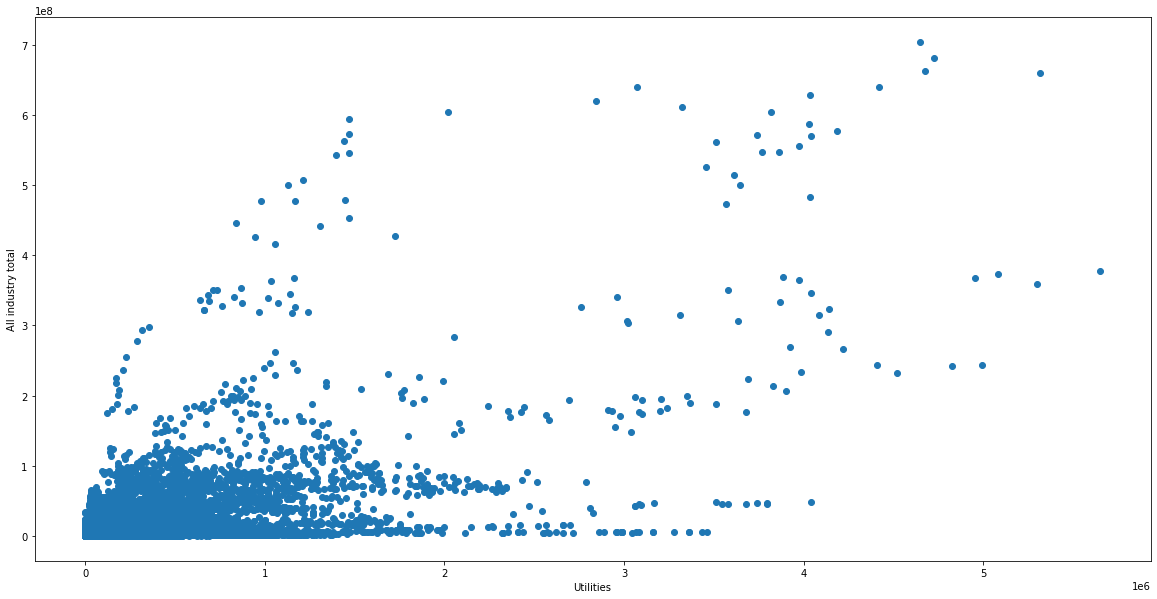

In [77]:
fig,ax = plt.subplots(figsize = (20,10))
plt.scatter('Utilities', 'All industry total', data=full_df)
plt.ylabel('All industry total')
plt.xlabel('Utilities')

Text(0.5, 0, 'Mining, quarrying, and oil and gas extraction')

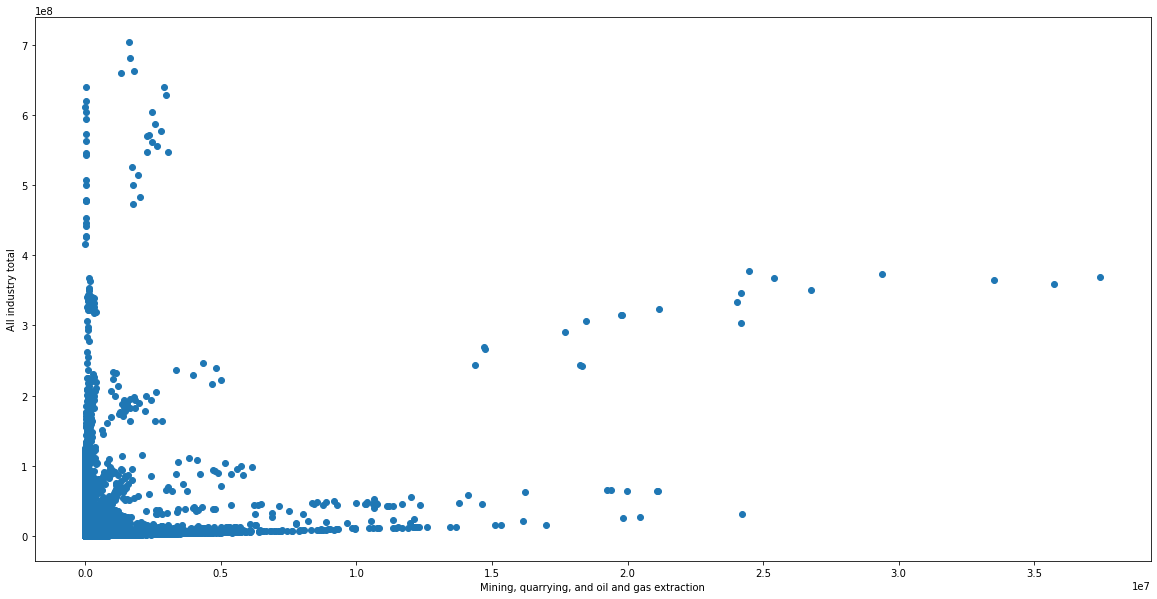

In [78]:
fig,ax = plt.subplots(figsize = (20,10))
plt.scatter('Mining, quarrying, and oil and gas extraction', 'All industry total', data=full_df)
plt.ylabel('All industry total')
plt.xlabel('Mining, quarrying, and oil and gas extraction')

Text(0.5, 0, 'Agriculture, forestry, fishing and hunting')

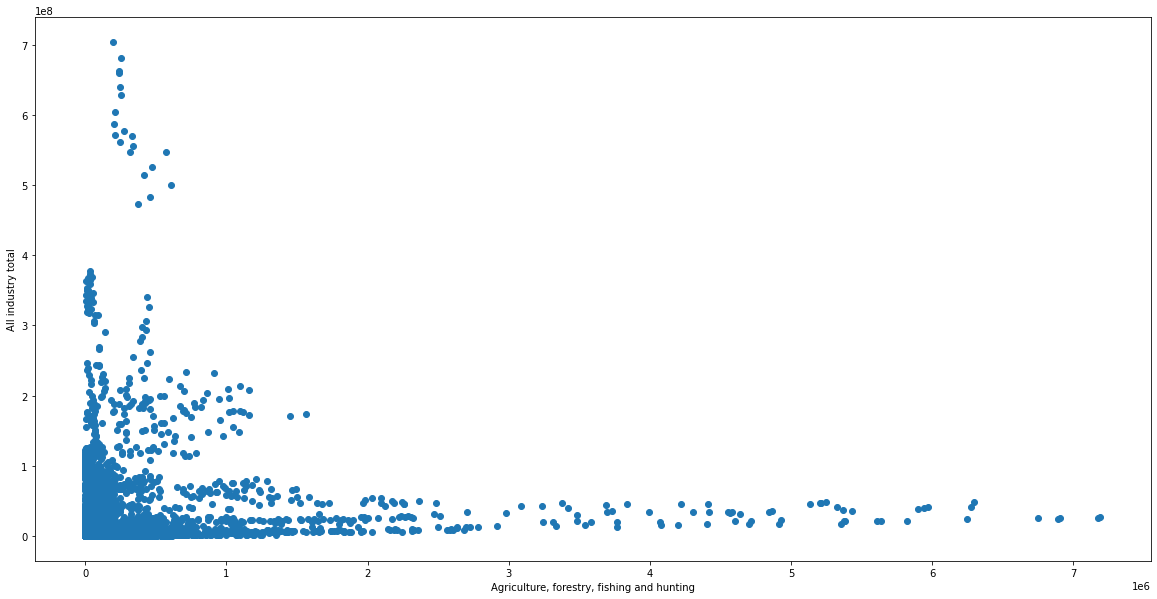

In [79]:
fig,ax = plt.subplots(figsize = (20,10))
plt.scatter('Agriculture, forestry, fishing and hunting', 'All industry total', data=full_df)
plt.ylabel('All industry total')
plt.xlabel('Agriculture, forestry, fishing and hunting')

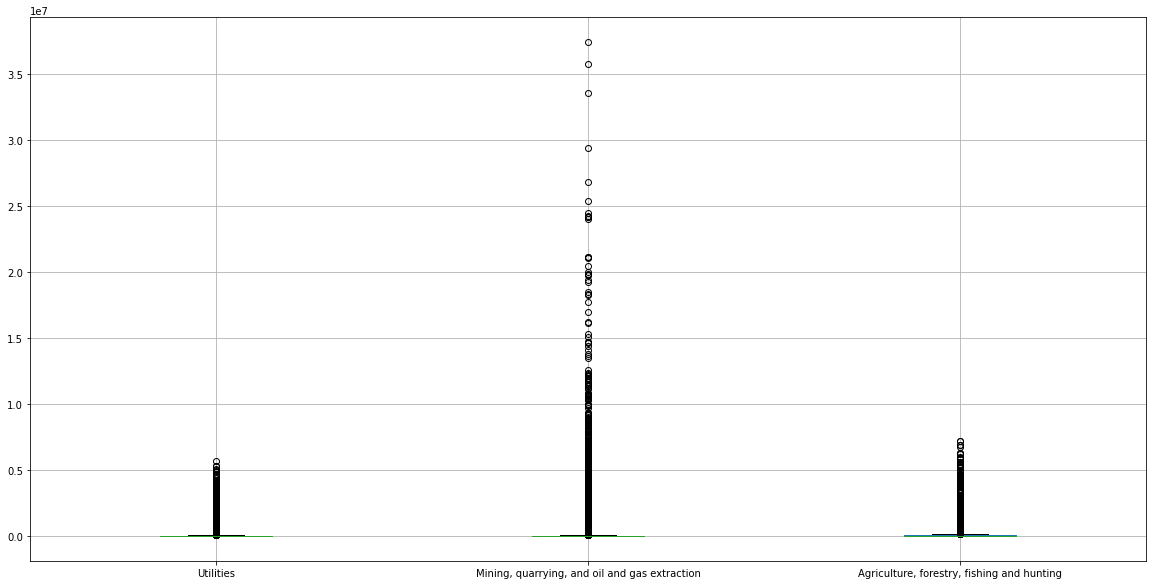

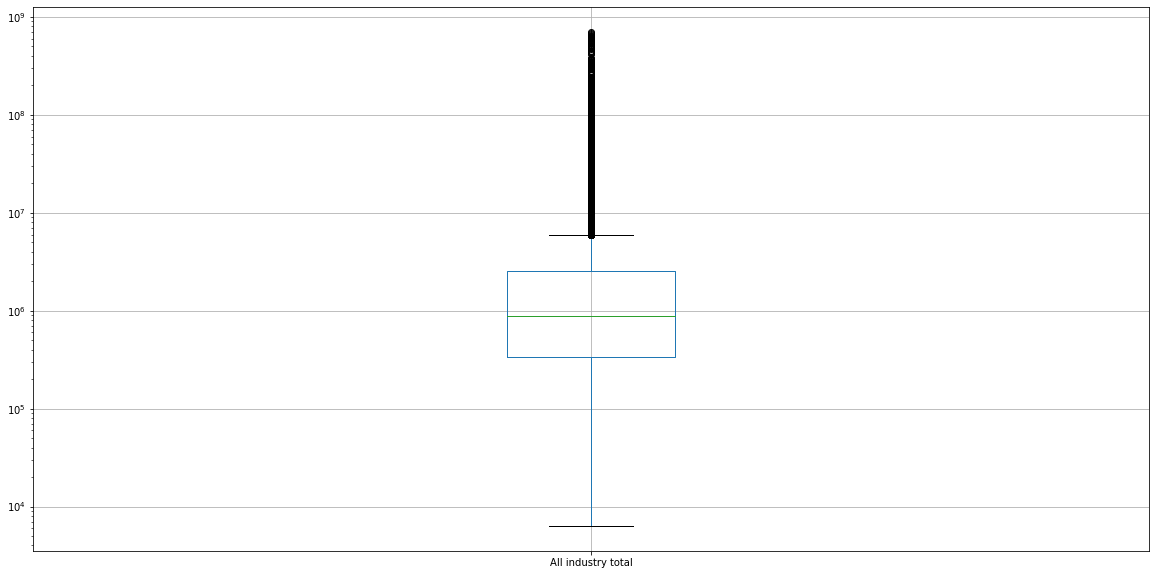

In [80]:
keys = ["Utilities", "Mining, quarrying, and oil and gas extraction", "Agriculture, forestry, fishing and hunting"]
keys2 = ["All industry total"]

fig,ax = plt.subplots(figsize = (20,10))
full_df[keys].boxplot(ax = ax)
fig,ax = plt.subplots(figsize = (20,10))
full_df[keys2].boxplot(ax = ax)
ax.set_yscale("log")

In [83]:
full_df.reset_index().groupby(["GeoFips"]).rolling(4).mean()

GeoFips  TimePeriod  \
GeoFips                              
1001    0          NaN         NaN   
        1          NaN         NaN   
        2          NaN         NaN   
        3       1001.0      2002.5   
        4       1001.0      2003.5   
...                ...         ...   
56045   62355  56045.0      2014.5   
        62356  56045.0      2015.5   
        62357  56045.0      2016.5   
        62358  56045.0      2017.5   
        62359  56045.0      2018.5   

               Finance, insurance, real estate, rental, and leasing  \
GeoFips                                                               
1001    0                                                    NaN      
        1                                                    NaN      
        2                                                    NaN      
        3                                              186102.00      
        4                                              201583.25      
...                                                          ...      
56045   62355                                           47316.50      
        62356                                           45972.25      
        62357                                           43758.75      
        62358                                           41454.25      
        62359                                           39272.25      

               Information  Transportation and warehousing  Retail trade  \
GeoFips                                                                    
1001    0              NaN                             NaN           NaN   
        1              NaN                             NaN           NaN   
        2              NaN                             NaN           NaN   
        3          8432.00                        17131.75     105097.00   
        4          9836.75                        17711.50     110753.25   
...                    ...                             ...           ...   
56045   62355      2560.25                        24854.50      14660.50   
        62356      2696.00                        23170.00      14658.00   
        62357      2886.00                        21450.50      14690.25   
        62358      2921.25                        17319.25      14481.75   
        62359      2867.50                        15058.25      14297.00   

               Wholesale trade  Nondurable goods manufacturing  \
GeoFips                                                          
1001    0                  NaN                             NaN   
        1                  NaN                             NaN   
        2                  NaN                             NaN   
        3             27006.50                             NaN   
        4             29960.25                             NaN   
...                        ...                             ...   
56045   62355              NaN                             NaN   
        62356              NaN                             NaN   
        62357              NaN                             NaN   
        62358              NaN                             NaN   
        62359              NaN                             NaN   

               Durable goods manufacturing  Manufacturing  ...  \
GeoFips                                                    ...   
1001    0                              NaN            NaN  ...   
        1                              NaN            NaN  ...   
        2                              NaN            NaN  ...   
        3                              NaN      210591.50  ...   
        4                              NaN      221221.50  ...   
...                                    ...            ...  ...   
56045   62355                          NaN            NaN  ...   
        62356                          NaN       83576.25  ...   
        62357                          NaN            NaN  ...   
        62358         

Text(0.5, 0, 'Utilities')

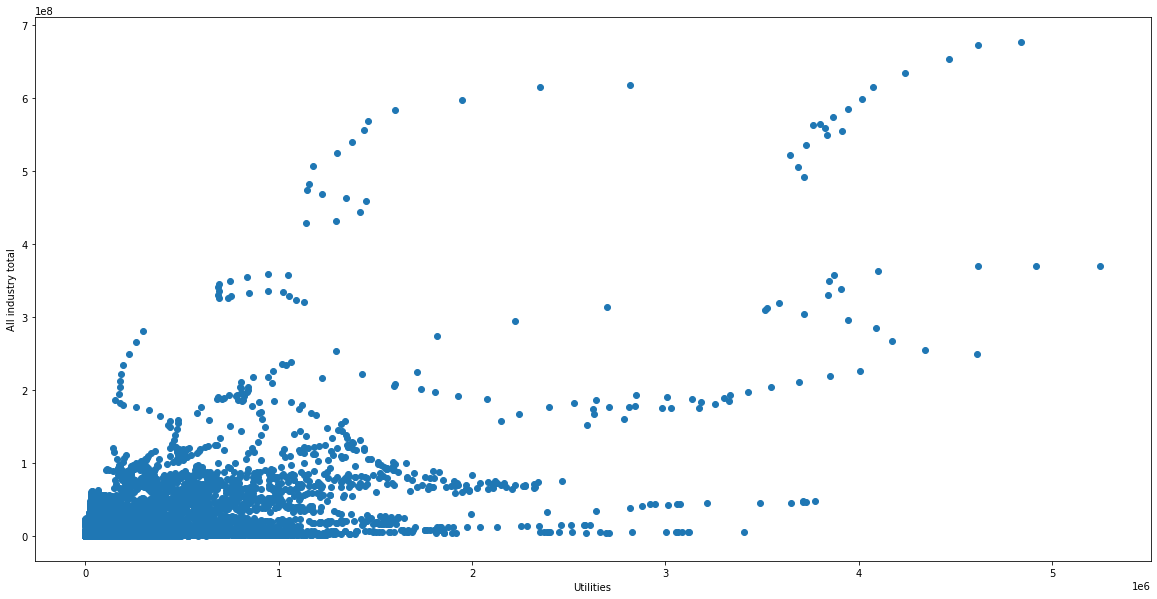

In [84]:
fig,ax = plt.subplots(figsize = (20,10))
plt.scatter('Utilities', 'All industry total', data=full_df.reset_index().groupby(["GeoFips"]).rolling(4).mean())
plt.ylabel('All industry total')
plt.xlabel('Utilities')

Text(0.5, 0, 'Mining, quarrying, and oil and gas extraction')

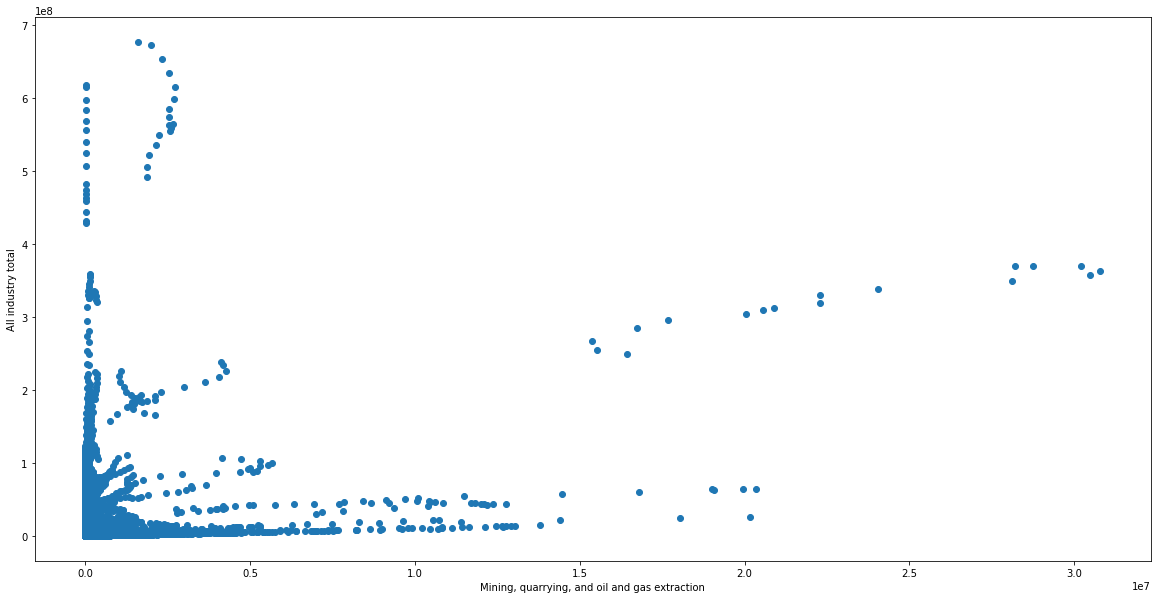

In [85]:
fig,ax = plt.subplots(figsize = (20,10))
plt.scatter('Mining, quarrying, and oil and gas extraction', 'All industry total', data=full_df.reset_index().groupby(["GeoFips"]).rolling(4).mean())
plt.ylabel('All industry total')
plt.xlabel('Mining, quarrying, and oil and gas extraction')

Text(0.5, 0, 'Agriculture, forestry, fishing and hunting')

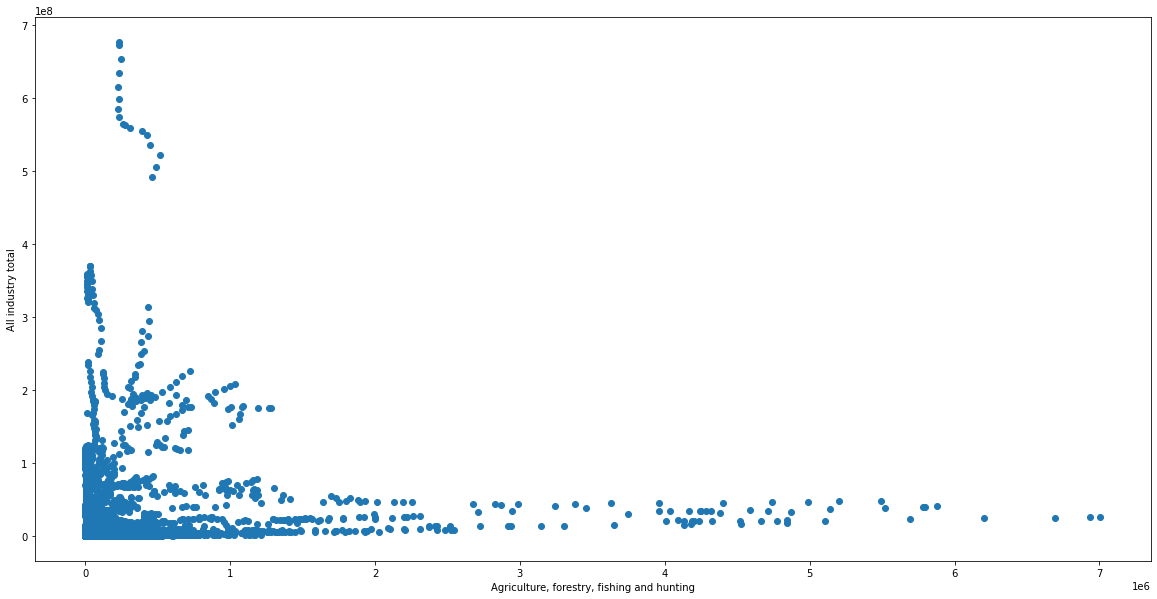

In [86]:
fig,ax = plt.subplots(figsize = (20,10))
plt.scatter('Agriculture, forestry, fishing and hunting', 'All industry total', data=full_df.reset_index().groupby(["GeoFips"]).rolling(4).mean())
plt.ylabel('All industry total')
plt.xlabel('Agriculture, forestry, fishing and hunting')